In [46]:
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=True)

import h5py
from bloch import *

from scipy.integrate import quad

In [81]:
filename = "Bloch-V=0_k=3.142_num-basis=21_num-q=100.hdf5"
with h5py.File(filename, "r") as f:
    V0, kl, l_max, num_q = f["Parameters"]
    E = f["E"][:]
    psi = f["psi"][:]
    q = f["q"][:]

In [82]:
blochs = [func_bloch(psi, i, 0, kl, l_max) for i in range(len(q))]
wannier = func_wannier(blochs, q, 0)

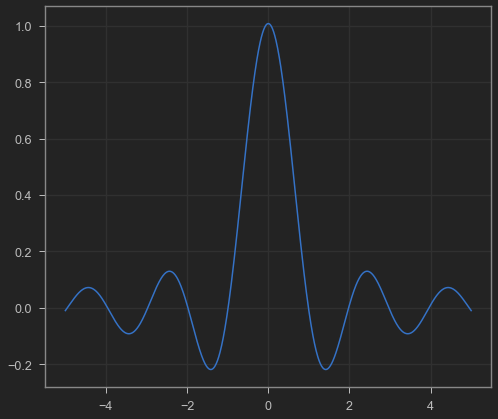

In [89]:
x = np.linspace(-5, 5, 1001)
plt.plot(x, np.real(np.vectorize(wannier)(x))/np.sqrt(quad(lambda x: np.abs(wannier(x)) ** 2, -10, 10)[0]))